In [1]:
import visualize_diffuse

INFO: [NumPy Grid] Attempting to load dataset from np_results.npz
INFO: [NumPy Grid] Loaded intensity ((450625,)) from np_results.npz
INFO: [NumPy Grid] Loaded q_vectors ((450625, 3)) from np_results.npz
INFO: [NumPy Grid] Found map_shape (25, 103, 175) in np_results.npz
INFO: [NumPy Grid] Intensity is 1D, attempting reshape.
INFO: [NumPy Grid] Reshaped intensity to: (25, 103, 175)
INFO: Visualizing 3D data with shape: (25, 103, 175)
/Users/ollie/Downloads/eryx/visualize_diffuse.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
INFO: Saved slice comparison to np_intensity_slices.png
INFO: Saved histogram plot to np_intensity_histogram.png


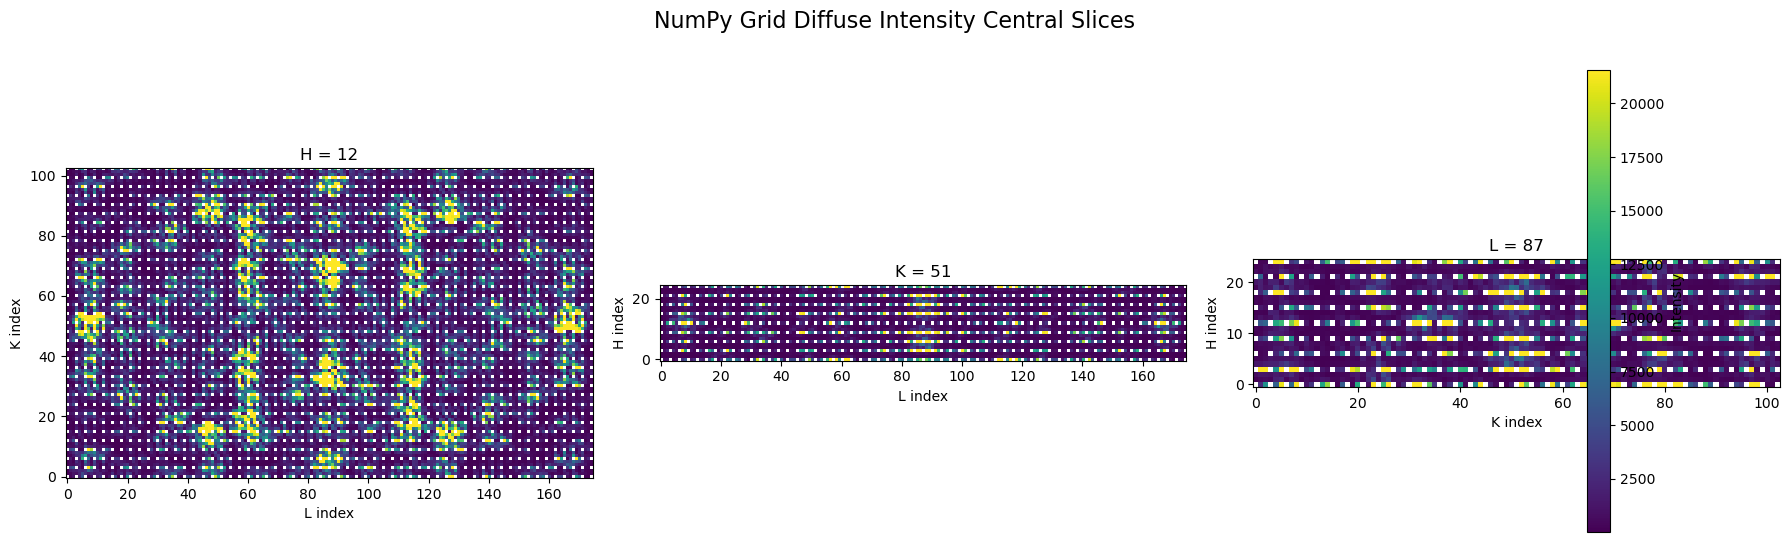

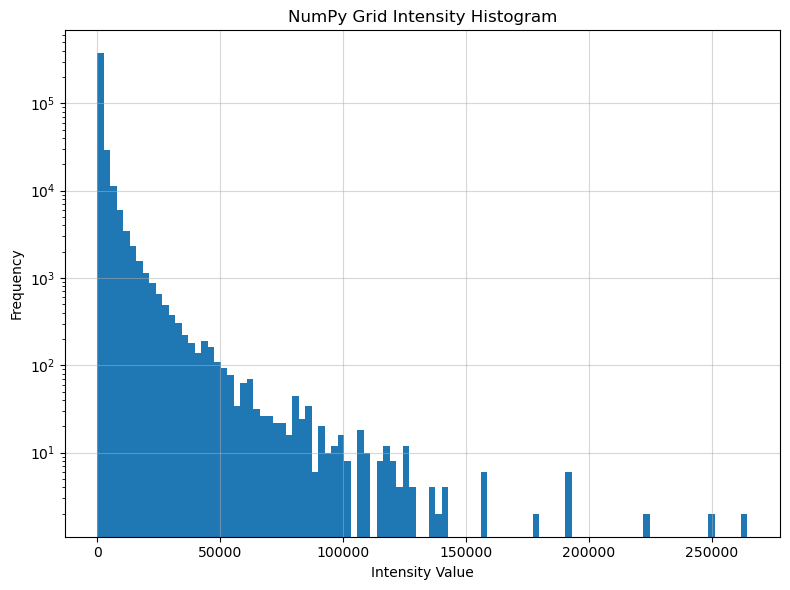

In [2]:
inp = visualize_diffuse.main('np')

In [6]:
from visualize_diffuse import load_intensity_data

# Load and get the 3D reshaped data (if possible) for the arbq dataset
q_vecs, intensity_3d, shape_3d = load_intensity_data('arbq')

if intensity_3d is not None and intensity_3d.ndim == 3:
    print(f"Loaded and reshaped arbq data with shape: {intensity_3d.shape}")
    # ... process intensity_3d ...
elif intensity_3d is not None:
    print(f"Loaded arbq data, but could not reshape. Shape: {intensity_3d.shape}")
    # ... handle 1D data ...
else:
    print("Failed to load arbq data.")

# Load the torch grid data
_, intensity_torch, _ = load_intensity_data('torch')
if intensity_torch is not None:
    print(f"Loaded torch grid data with shape: {intensity_torch.shape}")

ratio3d = intensity_3d / intensity_torch

INFO: [PyTorch Arb-Q] Attempting to load dataset from torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Loaded intensity ((450625,)) from torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Loaded q_vectors ((450625, 3)) from torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Found map_shape (25, 103, 175) in torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Intensity is 1D, attempting reshape.
INFO: [PyTorch Arb-Q] Reshaped intensity to: (25, 103, 175)
INFO: [PyTorch Grid] Attempting to load dataset from torch_grid_results.npz
INFO: [PyTorch Grid] Loaded intensity ((450625,)) from torch_grid_results.npz
INFO: [PyTorch Grid] Loaded q_vectors ((450625, 3)) from torch_grid_results.npz
INFO: [PyTorch Grid] Found map_shape (25, 103, 175) in torch_grid_results.npz
INFO: [PyTorch Grid] Intensity is 1D, attempting reshape.
INFO: [PyTorch Grid] Reshaped intensity to: (25, 103, 175)


Loaded and reshaped arbq data with shape: (25, 103, 175)
Loaded torch grid data with shape: (25, 103, 175)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def imshow_with_nan_interp(data, method='linear', cmap='viridis', interpolation='nearest', title='Image with NaN Interpolation', figsize=(10, 8)):
    """
    Display a 2D array with NaNs interpolated using scipy.griddata and matplotlib.imshow.

    Parameters:
        data (2D np.ndarray): Input array with possible NaNs.
        method (str): Interpolation method: 'linear', 'nearest', or 'cubic'.
        cmap (str): Colormap for imshow.
        interpolation (str): Interpolation argument for imshow display.
        title (str): Title for the plot.
        figsize (tuple): Figure size for the plot.
    """
    if data.ndim != 2:
        raise ValueError("Only 2D arrays are supported.")

    y = np.arange(data.shape[0])
    x = np.arange(data.shape[1])
    xx, yy = np.meshgrid(x, y)

    mask = ~np.isnan(data)

    if np.sum(mask) == 0:
        raise ValueError("Input array contains only NaNs.")

    interp_data = interpolate.griddata(
        (xx[mask], yy[mask]),
        data[mask],
        (xx, yy),
        method=method
    )

    plt.figure(figsize=figsize)
    plt.imshow(interp_data, interpolation=interpolation, cmap=cmap)
    plt.colorbar(label='Interpolated Values')
    plt.title(title)
    plt.show()


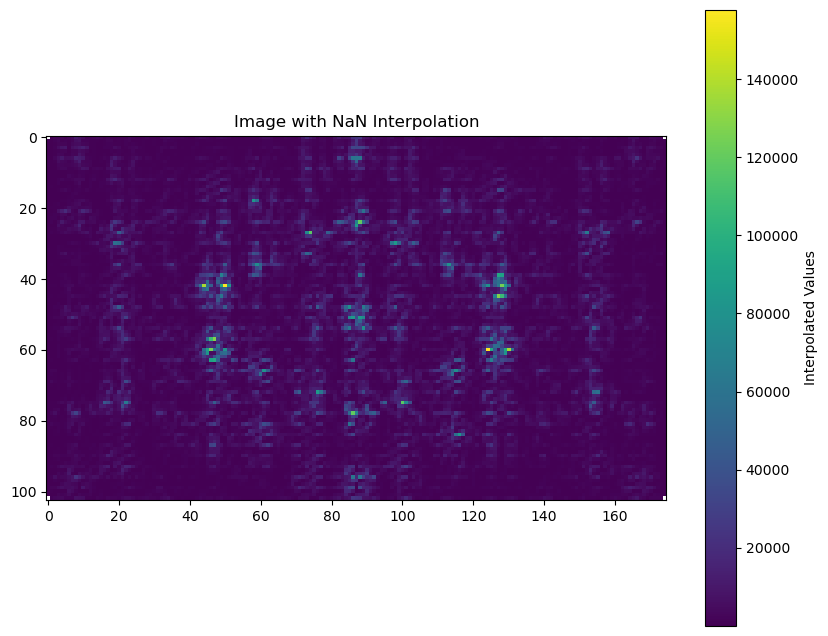

In [8]:
imshow_with_nan_interp(intensity_torch[3, :, :])

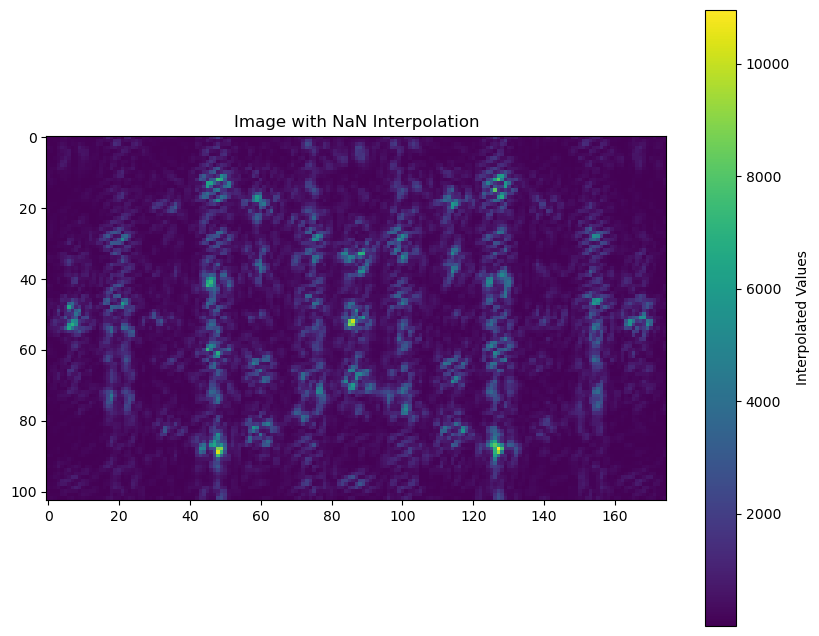

In [9]:
imshow_with_nan_interp((intensity_torch )[10, :, :])

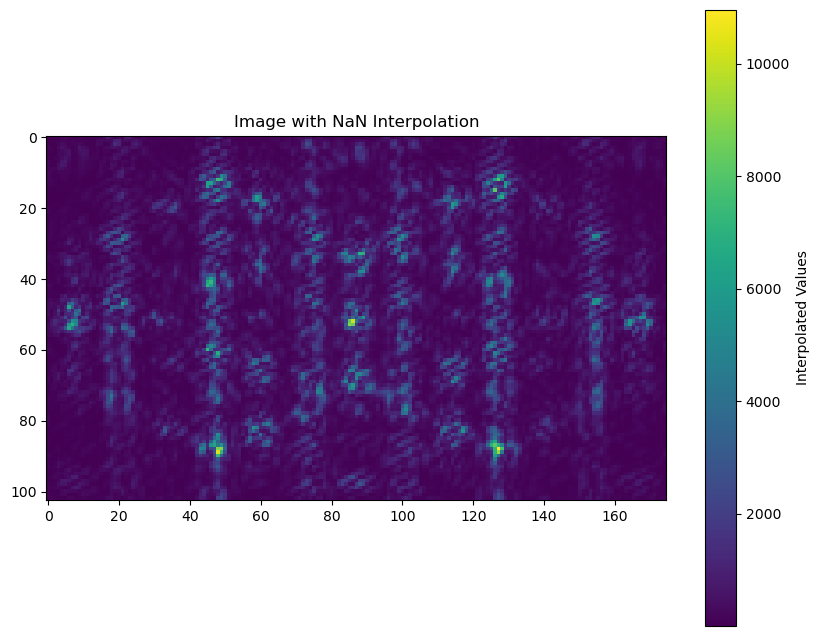

In [10]:
imshow_with_nan_interp((intensity_3d )[10, :, :])

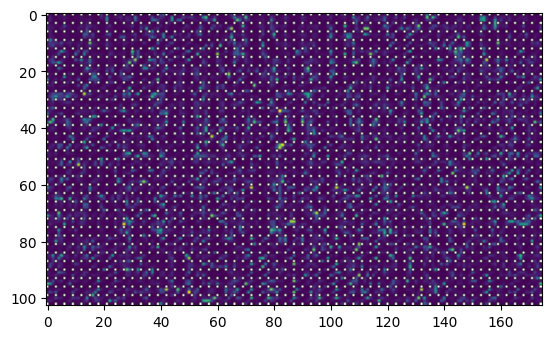

In [26]:
import matplotlib.pyplot as plt
plt.imshow(intensity_torch[3, :, :])
plt.imshow((intensity_3d / intensity_torch)[3, :, :])

INFO: [PyTorch Grid] Attempting to load dataset from torch_grid_results.npz
INFO: [PyTorch Grid] Loaded intensity ((450625,)) from torch_grid_results.npz
INFO: [PyTorch Grid] Loaded q_vectors ((450625, 3)) from torch_grid_results.npz
INFO: [PyTorch Grid] Found map_shape (25, 103, 175) in torch_grid_results.npz
INFO: [PyTorch Grid] Intensity is 1D, attempting reshape.
INFO: [PyTorch Grid] Reshaped intensity to: (25, 103, 175)
INFO: Visualizing 3D data with shape: (25, 103, 175)
INFO: Saved slice comparison to torch_intensity_slices.png
INFO: Saved histogram plot to torch_intensity_histogram.png


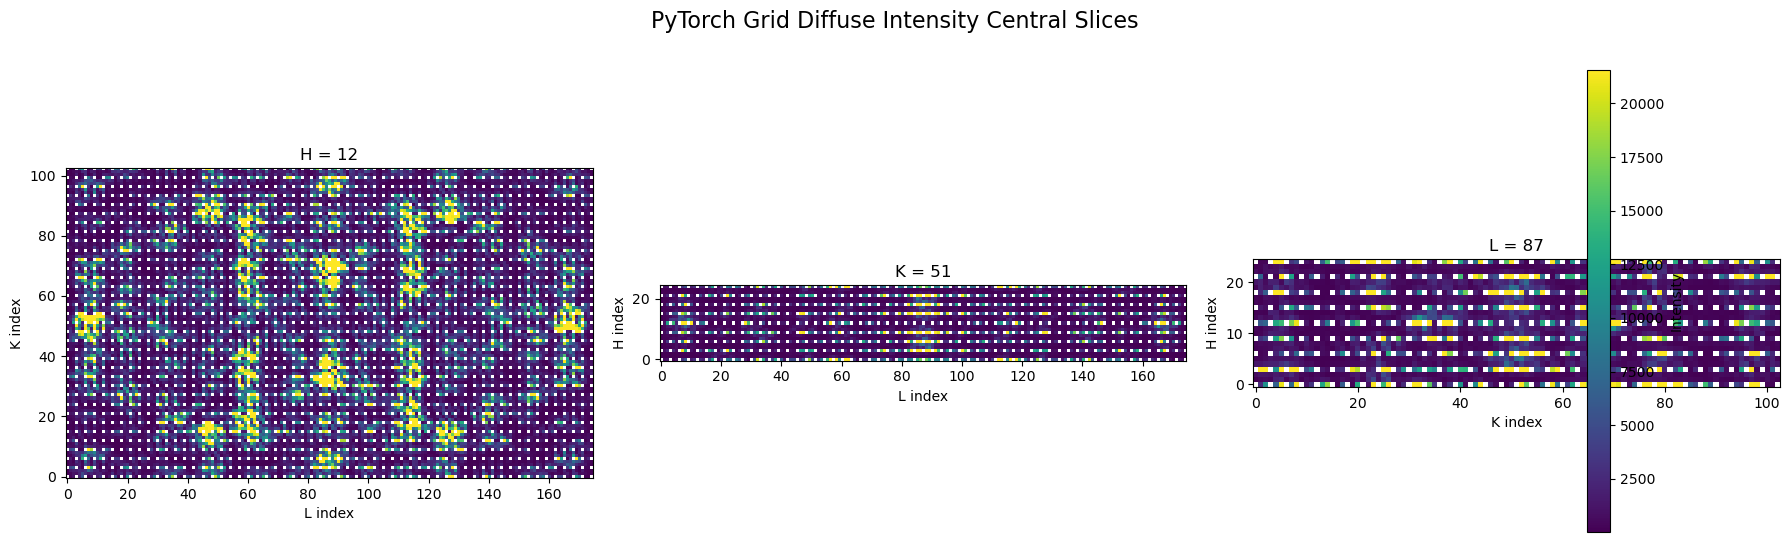

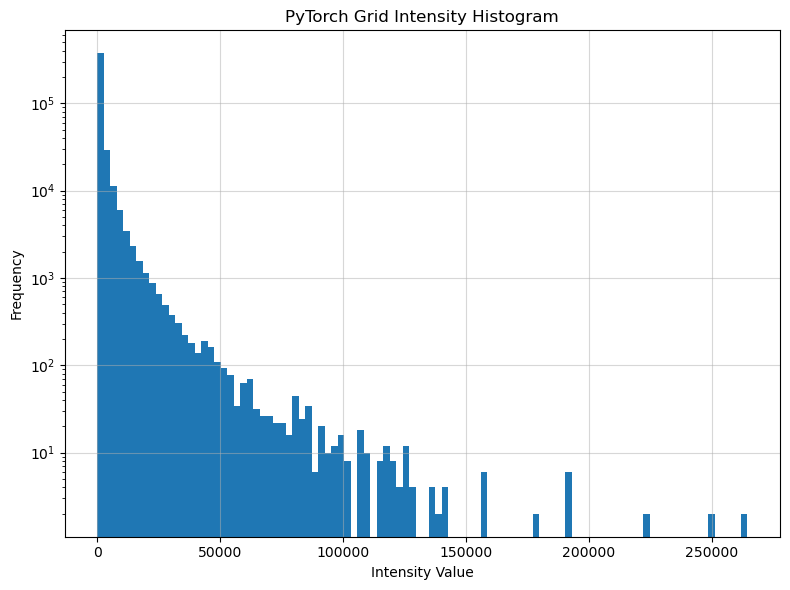

In [3]:
itorch = visualize_diffuse.main('torch')

In [4]:
inp - itorch

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

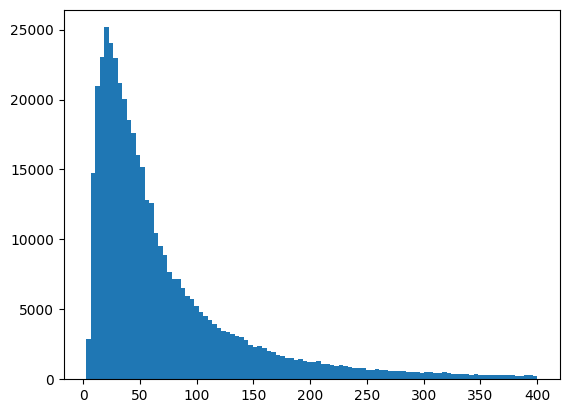

In [6]:
plt.hist(iarb[iarb < 4e2], bins = 100);

INFO: [PyTorch Arb-Q] Attempting to load dataset from torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Loaded intensity ((450625,)) from torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Loaded q_vectors ((450625, 3)) from torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Found map_shape (25, 103, 175) in torch_arbq_results.npz
INFO: [PyTorch Arb-Q] Intensity is 1D, attempting reshape.
INFO: [PyTorch Arb-Q] Reshaped intensity to: (25, 103, 175)
INFO: Visualizing 3D data with shape: (25, 103, 175)
/home/ollie/Documents/eryx/visualize_diffuse.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
INFO: Saved slice comparison to arbq_intensity_slices.png
INFO: Saved histogram plot to arbq_intensity_histogram.png


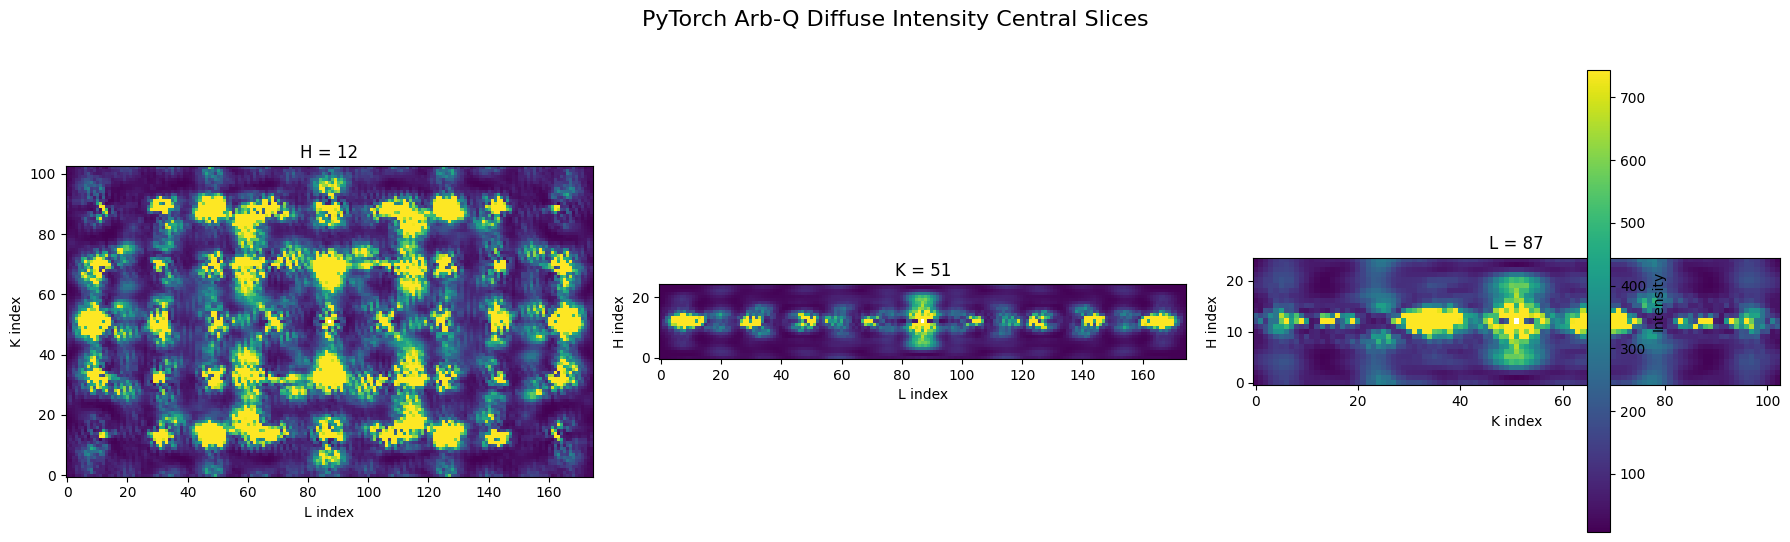

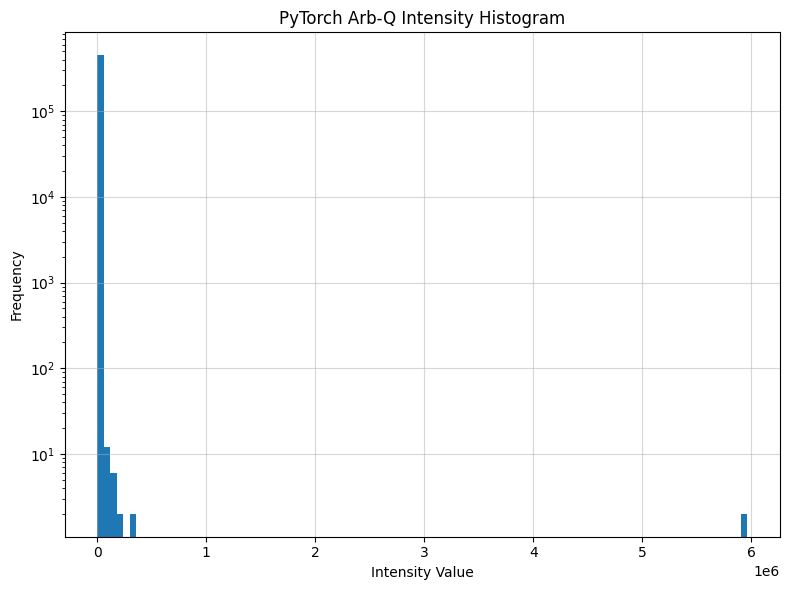

In [20]:
import matplotlib.pyplot as plt
iarb = visualize_diffuse.main('arbq')


In [7]:
iarb

array([[[ 7.94462824,  8.00399975,  7.95327049, ...,  8.08381081,
          8.04499561,  8.33542339],
        [ 9.740925  ,  9.83841668, 10.21042362, ..., 11.05306151,
          9.74720302,  9.32957078],
        [11.14733947, 10.60329172, 12.37755577, ..., 13.02988064,
         11.29680331, 10.75163139],
        ...,
        [ 9.89422975, 10.22726294, 12.22391506, ..., 12.70817911,
         11.01350134, 10.25525254],
        [ 8.3994851 ,  8.77454554,  9.6555092 , ..., 10.45156766,
          9.1062225 ,  9.17268911],
        [ 7.62814445,  7.54109266,  7.63692232, ...,  8.3594969 ,
          7.30542689,  8.19416904]],

       [[ 8.11660509,  7.98860616,  7.41812698, ...,  7.7907618 ,
          7.720189  ,  8.41662796],
        [ 9.35766875,  9.37863464,  8.8484496 , ...,  9.60759654,
          8.79406688,  9.19404829],
        [10.17910094, 10.44130229, 11.41682435, ..., 11.66548917,
         10.51670804, 10.22909209],
        ...,
        [ 9.69409076,  9.87147518, 11.23643315, ..., 1

In [8]:
iarb

array([[[ 7.94462824,  8.00399975,  7.95327049, ...,  8.08381081,
          8.04499561,  8.33542339],
        [ 9.740925  ,  9.83841668, 10.21042362, ..., 11.05306151,
          9.74720302,  9.32957078],
        [11.14733947, 10.60329172, 12.37755577, ..., 13.02988064,
         11.29680331, 10.75163139],
        ...,
        [ 9.89422975, 10.22726294, 12.22391506, ..., 12.70817911,
         11.01350134, 10.25525254],
        [ 8.3994851 ,  8.77454554,  9.6555092 , ..., 10.45156766,
          9.1062225 ,  9.17268911],
        [ 7.62814445,  7.54109266,  7.63692232, ...,  8.3594969 ,
          7.30542689,  8.19416904]],

       [[ 8.11660509,  7.98860616,  7.41812698, ...,  7.7907618 ,
          7.720189  ,  8.41662796],
        [ 9.35766875,  9.37863464,  8.8484496 , ...,  9.60759654,
          8.79406688,  9.19404829],
        [10.17910094, 10.44130229, 11.41682435, ..., 11.66548917,
         10.51670804, 10.22909209],
        ...,
        [ 9.69409076,  9.87147518, 11.23643315, ..., 1

Using dataset: torch_diffuse_intensity.npy
Diffuse intensity shape: (450625,)
Reshaped diffuse intensity to: (25, 103, 175)


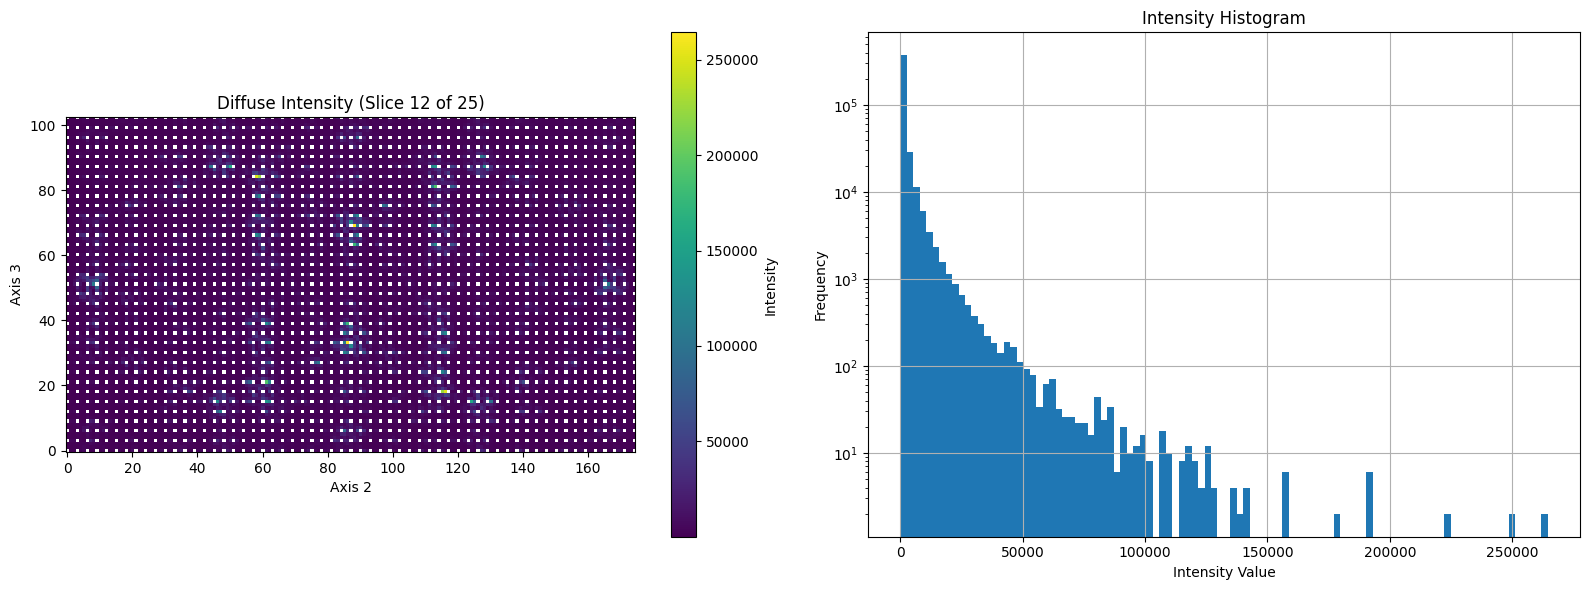

In [5]:
iqarb = visualize_diffuse.main('arb_q_diffuse_intensity')

In [8]:
itorch - iqarb

array([[[nan,  0.,  0., ...,  0.,  0., nan],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan,  0.,  0., ...,  0.,  0., nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [4]:
inp[0][0][:50], itorch[0][0][:50], (inp - itorch)[0][0][:50]

(array([          nan, 1902.97653668, 2092.11797715,           nan,
        2231.57030416, 2305.10802575,           nan, 1893.68023897,
        1641.14718683,           nan, 1750.0820469 , 1466.06481395,
                  nan,  242.36644233,  319.25094347,           nan,
        5700.49165874, 3567.87155626,           nan, 1830.46756052,
         286.23517055,           nan, 7509.32726993, 2341.03945113,
                  nan,  655.27702075, 1520.02360323,           nan,
         546.62315942,  856.05872542,           nan, 5776.5378203 ,
        1453.8624867 ,           nan,  747.99879495, 5898.29315568,
                  nan, 5883.70883492, 1059.42995291,           nan,
        3333.66844502, 4026.66989658,           nan, 1264.93160627,
        2260.90545589,           nan, 1373.18540415,  170.71353593,
                  nan, 3340.97902338]),
 array([          nan, 1902.97642381, 2092.12826902,           nan,
        2231.5767593 , 2305.11550394,           nan, 1893.68448033,
        

In [5]:
((inp - itorch) / itorch)[0][0][:50]

array([            nan,  4.99885403e-06, -5.01812820e-07,             nan,
        1.49997946e-07,  3.50976967e-06,             nan, -1.75182294e-06,
       -6.42721892e-06,             nan,  1.13601283e-05,  6.14265627e-06,
                   nan, -1.38098809e-05, -1.20792541e-05,             nan,
       -1.82672669e-06,  1.30749200e-06,             nan,  6.54292544e-06,
        2.61314051e-05,             nan,  2.94168717e-06,  6.78358667e-06,
                   nan,  1.44315854e-05,  3.53463667e-07,             nan,
        2.46650610e-05,  1.41222895e-05,             nan,  3.83441572e-06,
       -1.32449962e-05,             nan,  6.82298199e-06,  7.36462373e-06,
                   nan,  5.73118034e-06,  2.47314064e-06,             nan,
        8.27397871e-07, -2.38814966e-07,             nan, -7.23693090e-07,
        9.83878683e-07,             nan, -6.27090677e-06,  9.49746857e-06,
                   nan,  6.09603124e-06])